<a href="https://colab.research.google.com/github/princeKike27/Car-Dekho-Dealership/blob/main/CarDekhoDealership.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Car Dekho Dealership

For this project .....

In [110]:
# import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [111]:
# load dataset
df = pd.read_csv('https://raw.githubusercontent.com/princeKike27/Car-Dekho-Dealership/main/car_dekho_dealer.csv')

df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [112]:
# check shape of df
df.shape

(4340, 8)

In [113]:
# check column types
df.dtypes

name             object
year              int64
selling_price     int64
km_driven         int64
fuel             object
seller_type      object
transmission     object
owner            object
dtype: object

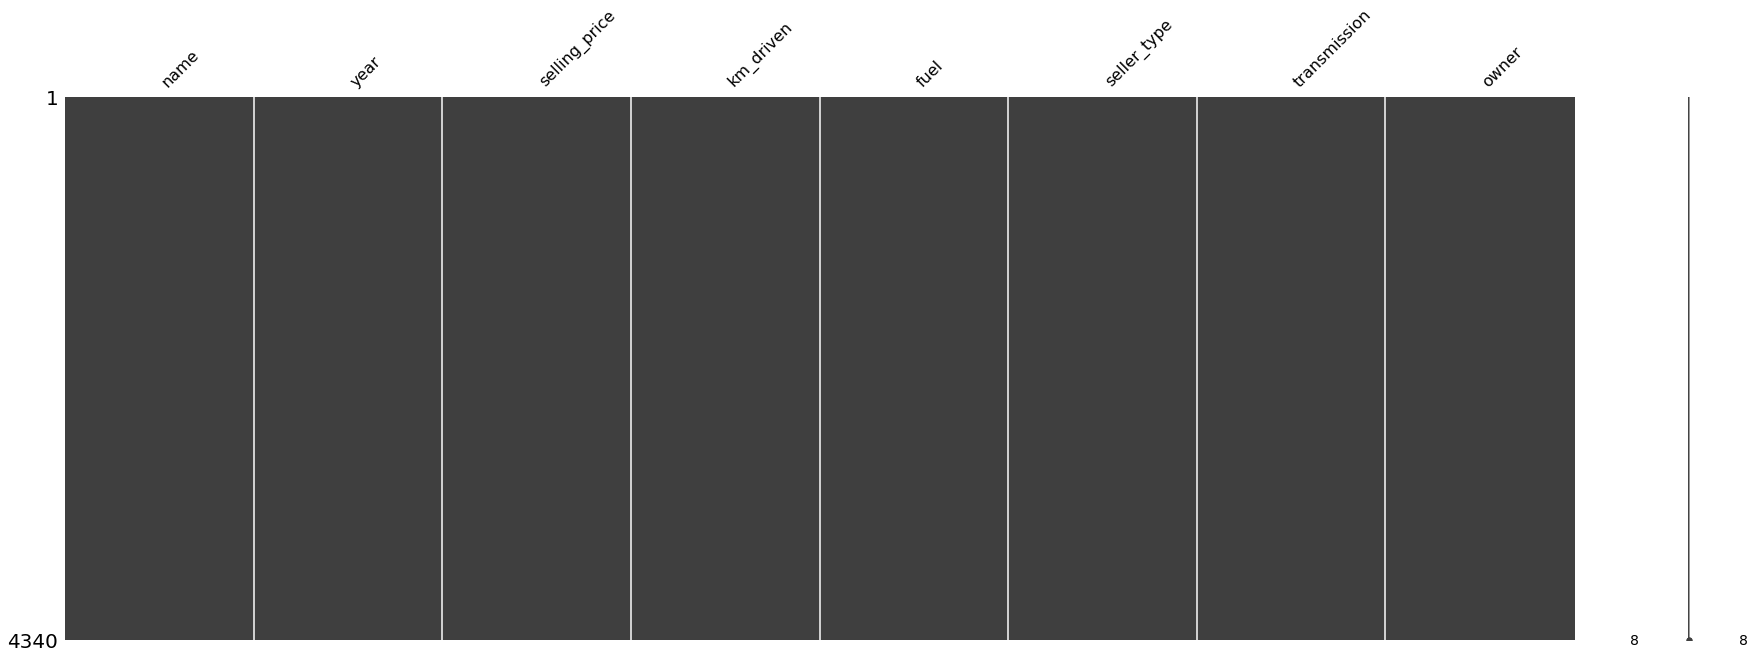

In [114]:
# check for missing values
import missingno as msg

msg.matrix(df, figsize=(30, 10))

In [115]:
# descriptive statistics of numeric columns
df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


# Numerical Features

In [116]:
# get the Avg price of cars sold and the Avg km_driven

# function to calculate avg price and km
def mean_calc(df):
  # dict to store avgs
  calc = {}
  calc['cars_in_dealership'] = len(df.selling_price)
  calc['avg_price'] = df['selling_price'].mean()
  calc['avg_km'] = df['km_driven'].mean()

  # return a Pandas Series 
  return pd.Series(calc, index=['cars_in_dealership', 'avg_price', 'avg_km'])

In [117]:
# avg price & km by year 
avg_price_km = df.groupby(['year']).apply(mean_calc).reset_index()

avg_price_km

,year,cars_in_dealership,avg_price,avg_km
0,1992,1.0,5.000000e+04,100000.000000
1,1995,1.0,9.500000e+04,100000.000000
2,1996,2.0,2.250000e+05,47500.000000
3,1997,3.0,9.300000e+04,90000.000000
4,1998,12.0,2.140000e+05,64583.333333
5,1999,10.0,7.350000e+04,67702.000000
6,2000,12.0,8.150000e+04,70936.916667
7,2001,20.0,1.176499e+05,83712.850000
8,2002,21.0,9.071429e+04,85047.619048
9,2003,23.0,8.656522e+04,81671.347826


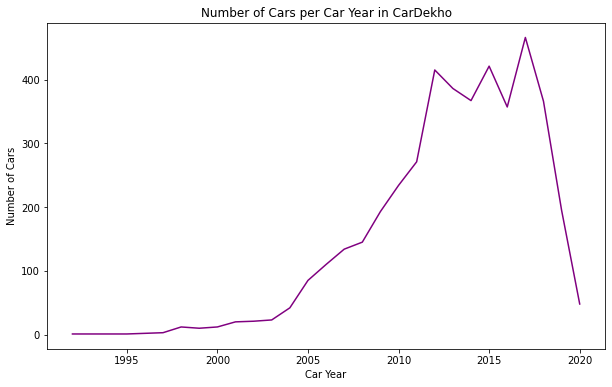

In [118]:
# plot of number of cars per car year in dealership

f, ax = plt.subplots(figsize=(10, 6))

sns.lineplot(x='year', y='cars_in_dealership', data=avg_price_km, color='purple')

plt.ylabel('Number of Cars')
plt.xlabel('Car Year')
plt.title('Number of Cars per Car Year in CarDekho')
plt.show()


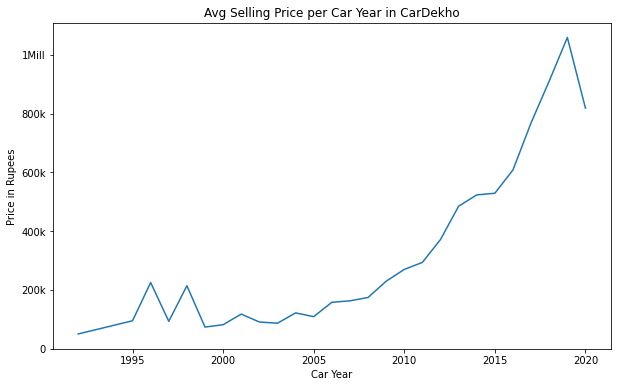

In [119]:
# plot of avg price of cars sold per car year 

f, ax = plt.subplots(figsize=(10, 6))

sns.lineplot(x='year', y='avg_price', data=avg_price_km)

# set y ticks
ax.set_yticks([0, 200000, 400000, 600000, 800000, 1000000])
ax.set_yticklabels([0, '200k', '400k', '600k', '800k', '1Mill'])

plt.xlabel('Car Year')
plt.ylabel('Price in Rupees')
plt.title('Avg Selling Price per Car Year in CarDekho')
plt.show()


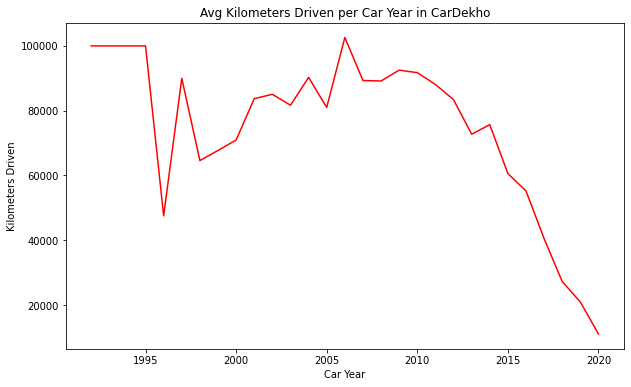

In [120]:
# plot of avg kms per car year in dealership

f, ax = plt.subplots(figsize=(10, 6))

sns.lineplot(x='year', y='avg_km', data=avg_price_km, color='red')

plt.xlabel('Car Year')
plt.ylabel('Kilometers Driven')
plt.title('Avg Kilometers Driven per Car Year in CarDekho')
plt.show()

# Categorical Features

In [121]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [122]:
# df of only categorical features

df_categorical = df.iloc[:, 4:]

# rename df column names
df_categorical = df_categorical.rename(
    columns={
        'fuel': 'Fuel',
        'seller_type': 'Seller',
        'transmission': 'Transmission',
        'owner': 'Owner'
    })

df_categorical.head()

,Fuel,Seller,Transmission,Owner
0,Petrol,Individual,Manual,First Owner
1,Petrol,Individual,Manual,First Owner
2,Diesel,Individual,Manual,First Owner
3,Petrol,Individual,Manual,First Owner
4,Diesel,Individual,Manual,Second Owner


In [123]:
# store features names in list

categories_features = list(df_categorical.columns)

In [124]:
# number of cars by each categorical feature
for el in categories_features:
  # count items for every el
  feature = df_categorical[el].value_counts()

  # turn series to DataFrame
  feature = feature.to_frame().reset_index()

  # rename columns
  feature = feature.rename(columns={
      'index': el,
      el: 'Number_Cars'
  })

  # calculate %
  feature['%_Cars'] = np.round((feature.Number_Cars / feature.Number_Cars.sum()) * 100 , 2)

  print(f'Number of Cars by {el} in CarDekho', '\n')
  print(feature, '\n'*4)




Number of Cars by Fuel in CarDekho 

       Fuel  Number_Cars  %_Cars
0    Diesel         2153   49.61
1    Petrol         2123   48.92
2       CNG           40    0.92
3       LPG           23    0.53
4  Electric            1    0.02 




Number of Cars by Seller in CarDekho 

             Seller  Number_Cars  %_Cars
0        Individual         3244   74.75
1            Dealer          994   22.90
2  Trustmark Dealer          102    2.35 




Number of Cars by Transmission in CarDekho 

  Transmission  Number_Cars  %_Cars
0       Manual         3892   89.68
1    Automatic          448   10.32 




Number of Cars by Owner in CarDekho 

                  Owner  Number_Cars  %_Cars
0           First Owner         2832   65.25
1          Second Owner         1106   25.48
2           Third Owner          304    7.00
3  Fourth & Above Owner           81    1.87
4        Test Drive Car           17    0.39 






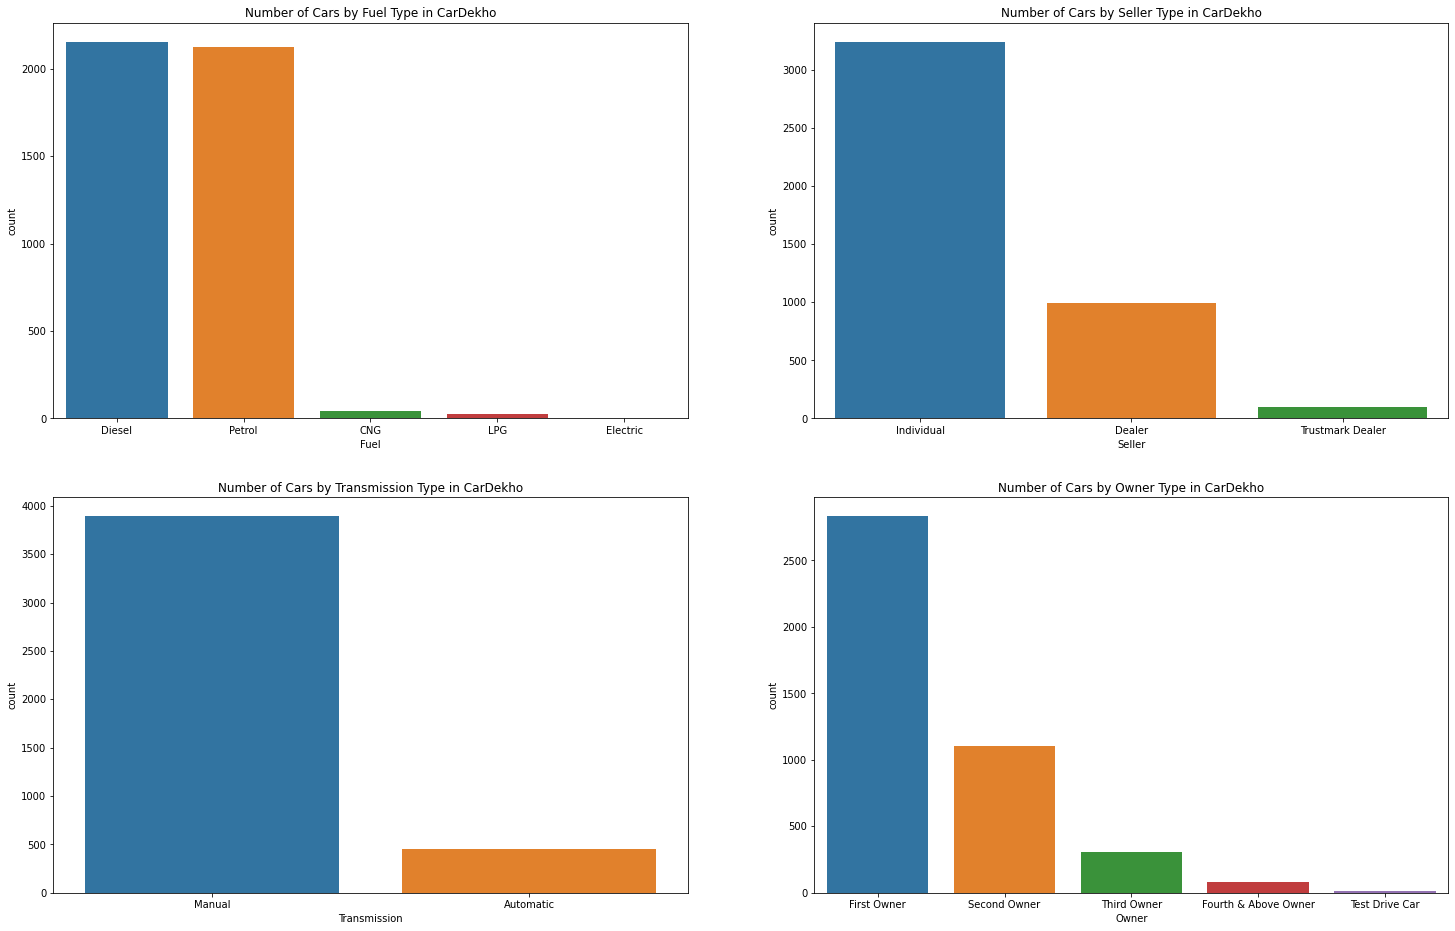

In [125]:
# CountPlots of Categorical Features

# figure size
fig = plt.figure(figsize=(25, 16))

# plot counter
n = 1

for el in categories_features:
  # set position to plot graph
  ax = plt.subplot(2, 2, n)

  sns.countplot(x=df_categorical[el], data=df_categorical[el], order=df_categorical[el].value_counts().index)

  plt.title(f'Number of Cars by {el} Type in CarDekho')

  # increase counter
  n += 1

plt.show() 

# Categories Encoding

### Car Brand

In [126]:
# separate the brand from the car name

df['brand'] = df['name'].str.split(' ').str[0]
df['brand'].unique()

array(['Maruti', 'Hyundai', 'Datsun', 'Honda', 'Tata', 'Chevrolet',
       'Toyota', 'Jaguar', 'Mercedes-Benz', 'Audi', 'Skoda', 'Jeep',
       'BMW', 'Mahindra', 'Ford', 'Nissan', 'Renault', 'Fiat',
       'Volkswagen', 'Volvo', 'Mitsubishi', 'Land', 'Daewoo', 'MG',
       'Force', 'Isuzu', 'OpelCorsa', 'Ambassador', 'Kia'], dtype=object)

In [127]:
# replace 'Land' for 'Land-Rover'

df['brand'].replace({'Land': 'Land-Rover'}, inplace=True)
df['brand'].unique()

array(['Maruti', 'Hyundai', 'Datsun', 'Honda', 'Tata', 'Chevrolet',
       'Toyota', 'Jaguar', 'Mercedes-Benz', 'Audi', 'Skoda', 'Jeep',
       'BMW', 'Mahindra', 'Ford', 'Nissan', 'Renault', 'Fiat',
       'Volkswagen', 'Volvo', 'Mitsubishi', 'Land-Rover', 'Daewoo', 'MG',
       'Force', 'Isuzu', 'OpelCorsa', 'Ambassador', 'Kia'], dtype=object)

In [128]:
# number of cars per brand

brands = df['brand'].value_counts()
brands = brands.to_frame().reset_index()

brands.rename(columns={
    'index': 'Brand',
    'brand': 'Number_Cars'
}, inplace=True)

brands['%_Cars'] = np.round((brands.Number_Cars / brands.Number_Cars.sum()) * 100 , 2)
brands.head(6)

,Brand,Number_Cars,%_Cars
0,Maruti,1280,29.49
1,Hyundai,821,18.92
2,Mahindra,365,8.41
3,Tata,361,8.32
4,Honda,252,5.81
5,Ford,238,5.48


#### One-Hot Encoding is going to be used to encode categorical features 
- For features with more than two values the Q3 of their values will be encoding into separate columns (feature1_coln) while the remaining will be econded into the other colum (feature1_other)

In [129]:
# copy of dataframe to encode categorical features
df_encoding = df
df_encoding.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,brand
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,Maruti
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,Datsun
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,Honda


### Fuel Encoding

In [130]:
# fuel encoding

# Diesel >> 49.61% of cars
df_encoding['fuel_diesel'] = [1 if df_encoding.loc[index, 'fuel'] == 'Diesel' else 0 for index in df_encoding.index]

# Petrol >> 48.92% of cars
df_encoding['fuel_petrol'] = [1 if df_encoding.loc[index, 'fuel'] == 'Petrol' else 0 for index in df_encoding.index]

# Other >> 1.47% of cars
df_encoding['other_fuel'] = [1 if df_encoding.loc[index, 'fuel'] != 'Diesel' and df_encoding.loc[index, 'fuel'] != 'Petrol' \
                             else 0 for index in df_encoding.index]

df_encoding.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,brand,fuel_diesel,fuel_petrol,other_fuel
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti,0,1,0
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,Maruti,0,1,0
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai,1,0,0
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,Datsun,0,1,0
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,Honda,1,0,0


### Seller Encoding

In [131]:
# seller encoding 

# Individual >> 74.75% of cars
df_encoding['seller_individual'] = [1 if df_encoding.loc[index, 'seller_type'] == 'Individual' else 0 for index in df_encoding.index]

# Dealer >> 22.90% of cars
df_encoding['seller_dealer'] = [1 if df_encoding.loc[index, 'seller_type'] == 'Dealer' else 0 for index in df_encoding.index]

# Other >> 2.35% of cars
df_encoding['seller_other'] = [1 if df_encoding.loc[index, 'seller_type'] == 'Trustmark Dealer' else 0 for index in df_encoding.index]


df_encoding.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,brand,fuel_diesel,fuel_petrol,other_fuel,seller_individual,seller_dealer,seller_other
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti,0,1,0,1,0,0
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,Maruti,0,1,0,1,0,0
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai,1,0,0,1,0,0
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,Datsun,0,1,0,1,0,0
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,Honda,1,0,0,1,0,0


### Owner Encoding


In [132]:
# owner encoding

# First Owner >> 65.25 of cars
df_encoding['owner_first'] = [1 if df_encoding.loc[index, 'owner'] == 'First Owner' else 0 for index in df_encoding.index]

# Second Owner >> 25.48 of cars
df_encoding['owner_second'] = [1 if df_encoding.loc[index, 'owner'] == 'Second Owner' else 0 for index in df_encoding.index]

# Other >> 9.27% of cars 
df_encoding['other_owner'] = [1 if df_encoding.loc[index, 'owner'] != 'First Owner' and \
                              df_encoding.loc[index, 'owner'] != 'Second Owner' else 0 for index in df_encoding.index]

df_encoding.head()


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,brand,fuel_diesel,fuel_petrol,other_fuel,seller_individual,seller_dealer,seller_other,owner_first,owner_second,other_owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti,0,1,0,1,0,0,1,0,0
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,Maruti,0,1,0,1,0,0,1,0,0
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai,1,0,0,1,0,0,1,0,0
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,Datsun,0,1,0,1,0,0,1,0,0
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,Honda,1,0,0,1,0,0,0,1,0


### Transmission Encoding

In [133]:
# trasnmission encoding

df_encoding = pd.get_dummies(df_encoding, columns=['transmission'])
df_encoding.head()

,name,year,selling_price,km_driven,fuel,seller_type,owner,brand,fuel_diesel,fuel_petrol,other_fuel,seller_individual,seller_dealer,seller_other,owner_first,owner_second,other_owner,transmission_Automatic,transmission_Manual
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,First Owner,Maruti,0,1,0,1,0,0,1,0,0,0,1
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,First Owner,Maruti,0,1,0,1,0,0,1,0,0,0,1
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,First Owner,Hyundai,1,0,0,1,0,0,1,0,0,0,1
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,First Owner,Datsun,0,1,0,1,0,0,1,0,0,0,1
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Second Owner,Honda,1,0,0,1,0,0,0,1,0,0,1


### Brand Encoding

In [140]:
# brand encoding

# Maruti >> 29.49% of cars
# Hyundai >> 18.92% of cars
# Mahindra >> 8.41% of cars
# Tata >> 8.32% of cars
# Honda >> 5.81% of cars
# Ford >> 5.48% of cars

brands_encode = ['Maruti', 'Hyundai', 'Mahindra', 'Tata', 'Honda', 'Ford']

for el in brands_encode:
  df_encoding[f'is_{el}'] = [1 if df_encoding.loc[index, 'brand'] == el else 0 for index in df_encoding.index]


# other brands 
brands_all = list(df_encoding['brand'].unique())
other_brands = []

for el in brands_all:
  if el not in brands_encode:
    other_brands.append(el)

# if the car brand is in other_brands list mark as 1 in 'is_other_Brand' column
df_encoding['is_other_Brand'] = [1 if df_encoding.loc[index, 'brand'] in other_brands else 0 for index in df_encoding.index]

df_encoding.tail()

,name,year,selling_price,km_driven,fuel,seller_type,owner,brand,fuel_diesel,fuel_petrol,other_fuel,seller_individual,seller_dealer,seller_other,owner_first,owner_second,other_owner,transmission_Automatic,transmission_Manual,is_Maruti,is_Hyundai,is_Mahindra,is_Tata,is_Honda,is_Ford,is_other_Brand
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Second Owner,Hyundai,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Second Owner,Hyundai,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Second Owner,Maruti,0,1,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,First Owner,Hyundai,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0
4339,Renault KWID RXT,2016,225000,40000,Petrol,Individual,First Owner,Renault,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1


## Feautures Dataframe

In [137]:
# print df columns

print(df_encoding.columns)

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'owner', 'brand', 'fuel_diesel', 'fuel_petrol', 'other_fuel',
       'seller_individual', 'seller_dealer', 'seller_other', 'owner_first',
       'owner_second', 'other_owner', 'transmission_Automatic',
       'transmission_Manual', 'is_Maruti', 'is_Hyundai', 'is_Mahindra',
       'is_Tata', 'is_Honda', 'is_Ford', 'is_other_Brand'],
      dtype='object')


In [142]:
# features dataframe
df_features = df_encoding[['year', 'km_driven', 'fuel_diesel', 'fuel_petrol', 'other_fuel', 'seller_individual', 'seller_dealer',  \
                           'seller_other', 'owner_first', 'owner_second', 'other_owner', 'transmission_Automatic', 'transmission_Manual', \
                           'is_Maruti', 'is_Hyundai', 'is_Mahindra', 'is_Tata', 'is_Honda', 'is_Ford', 'is_other_Brand']]

df_features.head()

,year,km_driven,fuel_diesel,fuel_petrol,other_fuel,seller_individual,seller_dealer,seller_other,owner_first,owner_second,other_owner,transmission_Automatic,transmission_Manual,is_Maruti,is_Hyundai,is_Mahindra,is_Tata,is_Honda,is_Ford,is_other_Brand
0,2007,70000,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0
1,2007,50000,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0
2,2012,100000,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0
3,2017,46000,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1
4,2014,141000,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0
